In [1]:
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression, LogisticRegression 
import seaborn as sns
import numpy as npy
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/pipe2015/Projects_unad/main/data_csv/regresion-logistica.csv", sep=",")

In [4]:
data.head(10) # 10 rows 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
data_colums = data.get(['BMI','currentSmoker']);

In [7]:
data_colums.head() # default 5 rows 

,BMI,currentSmoker
0,26.97,0
1,28.73,0
2,25.34,1
3,28.58,1
4,23.10,1


<Axes: xlabel='BMI', ylabel='currentSmoker'>

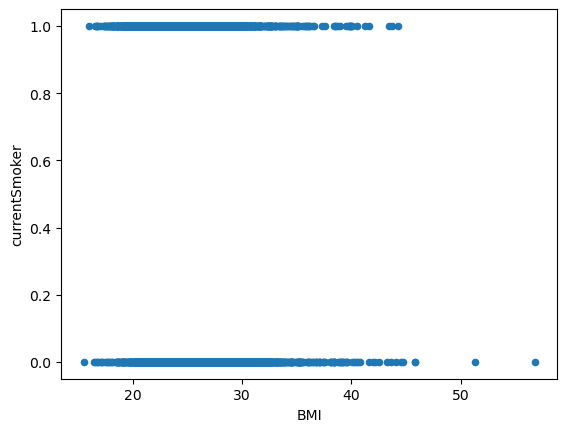

In [8]:
data_comuns.plot.scatter(x='BMI',y='currentSmoker')

In [9]:
# delete rows diff empy values 
model_clear_data  = data.dropna();
model_clear_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
# Agrego los datos en un array
x_model_cleaned = np.array(model_clear_data['BMI']).reshape((-1, 1))
y_model_cleaned = np.array(model_clear_data['currentSmoker'])

In [11]:
# create model
model = LogisticRegression().fit(x_model_cleaned, y_model_cleaned);
        
print('interseccion (b)', model.intercept_)
print('Pendiente (m)', model.coef_)

interseccion (b) [2.0805622]
Pendiente (m) [[-0.0825366]]


In [19]:
# define funcion line rect return (dict)
def get_line_rect(model_clear, w = -0.08, b = 2.08):
        x = np.linspace(0, model_clear['BMI'].max(), 100);
        y = 1 / ( 1 + np.exp(-(w * x + b)));
        return {'x' : x, 'y' : y};

In [16]:
line_rect = get_line_rect(model_clear_data);

<Axes: xlabel='BMI', ylabel='currentSmoker'>

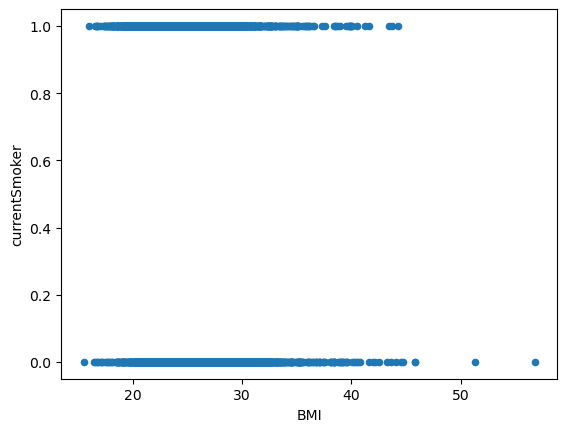

In [20]:
# show graphics Data recta
data.plot.scatter(x='BMI',y='currentSmoker')

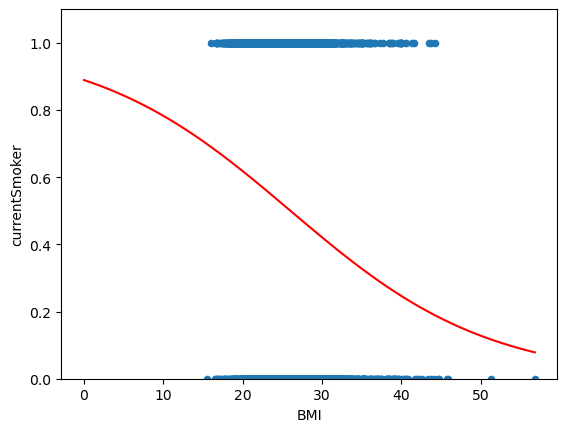

In [23]:
# show graphics Data recta
data.plot.scatter(x='BMI',y='currentSmoker')
plot.plot(line_rect['x'], line_rect['y'], 'red')
plot.ylim(0, data['currentSmoker'].max() * 1.1)
# plt.grid()
plot.show()